# Final Project: Facial Keypoints Detection

by Michael Berger, Andre Fernandes, Vivian Lu, and Pauline Wang.

Our project related to the kaggle [facial keypoint detection competition](https://www.kaggle.com/c/facial-keypoints-detection). We need to build a well-performing machine learning system to determine the x and y coordinates of keypoints in an image of a human face (e.g. left eye corner). There are up to 30 keypoints. The problem is a regression problem and in this task we have up to 30 regression outputs to predict (x and y of 15 labels). We will especially focus on practicing **Convolutional Neural Networks**. As baseline model we use xyz. The metric used on teh kaggle competition is the root mean squared error (RMSE) defined as:

$RMSE = \sqrt{ \frac{1}{n} \sum^n_{i=1} (y_i - \hat{y}_i)^2}$

Our analysis is structured as follows:
- We first load the libraries we use as well as the testing and training data.
- We then transform the data in a shape and format useable for us.
- We plot a couple of training images and associated keypoints.
- ...

## Libraries and Data

Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:

left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Left and right here refers to the point of view of the subject.

In some examples, some of the target keypoint positions are misssing (encoded as missing entries in the csv, i.e., with nothing between two commas).

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.metrics import classification_report

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras import optimizers

# import theano 
# from theano import tensor as T
# from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams

C:\Users\afern\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# not in git repo because of file size...
path_train = 'C:/Users/afern/Desktop/Git/w207-project-final/data/training.csv'
path_test = 'C:/Users/afern/Desktop/Git/w207-project-final/data/test.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [3]:
df_test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [4]:
df_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
# positions training
labels = df_train.iloc[:, 0:30]
labels.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [6]:
# processing training data such that each pixel has its own column and is seperated from the labels
kaggle_train = df_train.loc[:,'Image'].T
kaggle_train = kaggle_train.astype(str)
kaggle_train = kaggle_train.str.split(" ", expand = True) 
kaggle_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,238,236,237,238,240,240,239,241,241,243,...,33,29,30,34,39,49,62,70,75,90
1,219,215,204,196,204,211,212,200,180,168,...,1,1,1,1,1,1,1,1,1,1
2,144,142,159,180,188,188,184,180,167,132,...,64,60,56,61,70,69,71,78,78,77
3,193,192,193,194,194,194,193,192,168,111,...,1,1,1,1,1,1,1,1,1,1
4,147,148,160,196,215,214,216,217,219,220,...,33,34,37,37,43,46,83,140,170,176


In [7]:
# processing test data such that each pixel has its own column,
# merging it then with the ImageId column
image_test = df_test.loc[:,'Image'].T
image_test = image_test.astype(str)
image_test = image_test.str.split(" ", expand = True)
kaggle_test = pd.DataFrame(df_test.loc[:,'ImageId']).join(image_test)
kaggle_test.head()

,ImageId,0,1,2,3,4,5,6,7,8,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,1,182,183,182,182,180,180,176,169,156,...,6,14,28,28,24,18,12,8,5,5
1,2,76,87,81,72,65,59,64,76,69,...,156,152,162,169,168,159,191,228,211,168
2,3,177,176,174,170,169,169,168,166,166,...,1,1,1,1,1,1,1,1,1,1
3,4,176,174,174,175,174,174,176,176,175,...,144,143,141,142,143,142,142,142,142,140
4,5,50,47,44,101,144,149,120,58,48,...,254,254,254,253,255,236,174,175,175,165


In [8]:
# Missing values kaggle_training?
kaggle_train.columns[kaggle_train.isna().any()].tolist()

[]

In [9]:
# Missing values in labels?
labels.columns[labels.isna().any()].tolist()

['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y']

In [10]:
kaggle_train.shape

(7049, 9216)

In [11]:
kaggle_test.shape

(1783, 9217)

In [13]:
kaggle_train.describe()

KeyboardInterrupt: 

In [ ]:
labels.describe()

In [14]:
labels.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
labels.shape

In [ ]:
#percentage missing per label
labels.isnull().sum() / labels.shape[0]

We have missing values in the labels... how to deal with that?

## Plotting some images with face points

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# y_train = kaggle_train
# y_test = np_utils.to_categorical(y_test, num_classes)

# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')

# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(kaggle_train)

# # fits the model on batches with real-time data augmentation:
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) / 32, epochs=epochs)

# # here's a more "manual" example
# for e in range(epochs):
#     print('Epoch', e)
#     batches = 0
#     for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
#         model.fit(x_batch, y_batch)
#         batches += 1
#         if batches >= len(x_train) / 32:
#             # we need to break the loop by hand because
#             # the generator loops indefinitely
#             break

In [16]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
# i = 0
# for batch in datagen.flow(kaggle_train[1], batch_size=1):
#   plt.figure(i)
#   imgplot = plt.imshow(array_to_img(batch[0]))
#   i += 1
#   if i % 5 == 0:
#     break

In [ ]:
# i = 0
# for batch in datagen.flow(kaggle_train, batch_size=1):
#   plt.figure(i)
#   imgplot = plt.imshow(array_to_img(batch[0]))
#   i += 1
#   if i % 5 == 0:
#     break

In [ ]:
# x_img

In [ ]:
# testin = img_to_array(x_img)
# testin = testin.reshape((1,)+testin.shape)
# testin
# new_img = datagen.flow(testin, batch_size=1)

In [ ]:
# new_img

In [ ]:
# new_img = datagen.flow(x_img, batch_size=1)

In [51]:
kaggle_train

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,238,236,237,238,240,240,239,241,241,243,...,33,29,30,34,39,49,62,70,75,90
1,219,215,204,196,204,211,212,200,180,168,...,1,1,1,1,1,1,1,1,1,1
2,144,142,159,180,188,188,184,180,167,132,...,64,60,56,61,70,69,71,78,78,77
3,193,192,193,194,194,194,193,192,168,111,...,1,1,1,1,1,1,1,1,1,1
4,147,148,160,196,215,214,216,217,219,220,...,33,34,37,37,43,46,83,140,170,176
5,167,169,170,167,156,145,106,68,52,24,...,107,105,103,97,86,86,82,78,86,95
6,109,109,125,141,145,139,120,81,45,34,...,94,115,145,139,114,110,117,117,108,103
7,178,177,178,179,179,179,181,185,188,184,...,59,70,75,78,93,119,120,100,72,74
8,164,158,118,76,66,69,59,53,43,31,...,49,56,44,33,45,60,72,85,102,138
9,226,227,225,224,221,220,215,210,210,208,...,109,113,112,113,116,116,119,118,114,113


In [338]:
?norm_img

(96, 96, 1) (96, 96)
(96, 96, 1) (96, 96)
(96, 96, 1) (96, 96)
(96, 96, 1) (96, 96)
(96, 96, 1) (96, 96)


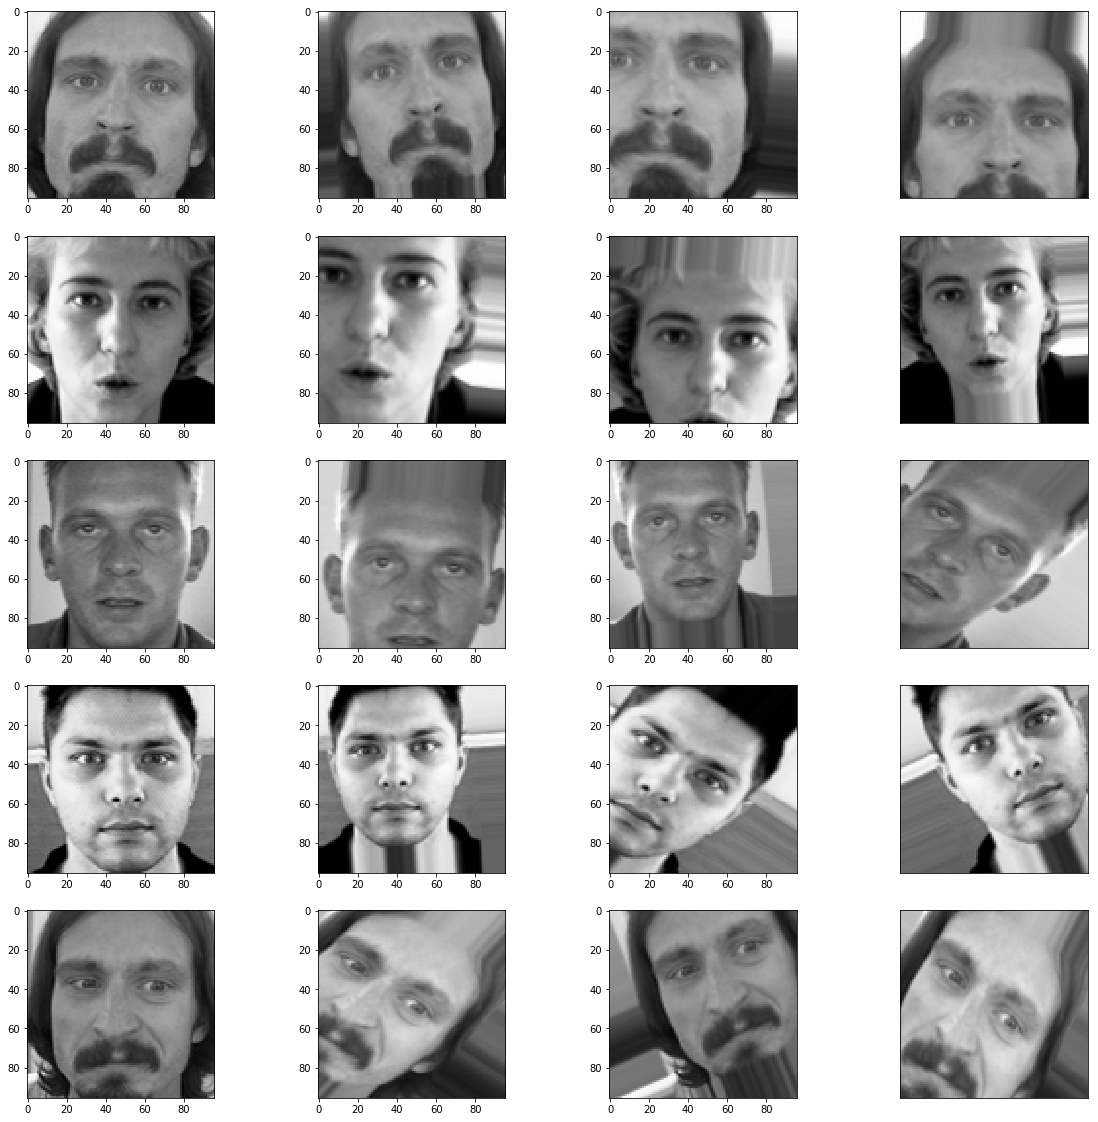

In [367]:
position = 1
fig = plt.figure(figsize = (20, 20))
batch_size=3


for index in range(5):
#     print(index)
    sub = fig.add_subplot(5, 4, position)
    x_img = np.reshape(np.array(kaggle_train.iloc[index,:].astype(int)), (96, 96))
    plt.imshow(x_img, cmap = 'gray')
    new_img = img_to_array(x_img)
    
    array_test2= np.reshape(np.array(create_mask(get_target_coordinates(pd.DataFrame(labels.iloc[index,:])))), (96, 96))
    print(new_img.shape, array_test2.shape)
    
    #new_img2 = new_img #np.dstack([new_img,new_img])
    #print(new_img2.shape)
    new_img = new_img.reshape((1,)+new_img.shape)
    new_img2 = array_test2.reshape(new_img.shape)
    #print(new_img.shape, new_img2.shape)
    i=0
    for batch in datagen.flow(new_img, batch_size=batch_size, seed=index):
        #print(batch)
#         norm_img = datagen.flow(new_img, batch_size=batch_size, seed=index)
#         mask_img = datagen.flow(new_img2, batch_size=batch_size, seed=index)
        #print(norm_img)
#         print(i*index+i+2)
        sub = fig.add_subplot(5, 4, (batch_size+1)*index+i+2)
        plt.imshow(array_to_img(batch[0]))
        #plt.imshow(array_to_img(new_img[i]), cmap = 'gray')
        i += 1
        if i % batch_size == 0:
            break
            
    for batch2 in datagen.flow(new_img2, batch_size=batch_size, seed=index):
        #print(batch)
#         norm_img = datagen.flow(new_img, batch_size=batch_size, seed=index)
#         mask_img = datagen.flow(new_img2, batch_size=batch_size, seed=index)
#         print(norm_img)
# #         print(i*index+i+2)
#         sub = fig.add_subplot(5, 4, (batch_size+1)*index+i+2)
#         plt.imshow(array_to_img(batch[0]))
        #plt.imshow(array_to_img(new_img[i]), cmap = 'gray')
        view2 = batch2[0]
        i += 1
        if i % batch_size == 0:
            break
#     for coord in range(0, labels.iloc[index,:].shape[0]-1, 2):
#         if coord == None:
#             continue
#         else:
#             plt.gca().scatter(labels.iloc[index,coord], labels.iloc[index,coord+1], c = 'red', s = 5)

    sub.set_xticks([])
    sub.set_yticks([])
    
    position += 4

plt.show()

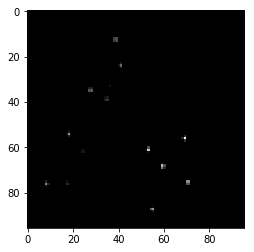

In [366]:
plt.imshow(array_to_img(view2))

In [362]:
v2

NameError: name 'v2' is not defined

In [ ]:
new_img2 = np.zeros(96*96)
new_img2[0]

In [288]:
new_img2[6375] = 1

In [272]:
array_test.flatten()

AttributeError: 'list' object has no attribute 'flatten'

In [296]:
def re_round(li, _prec=5):
     try:
        return round(li, _prec)
     except TypeError:
        return type(li)(re_round(x, _prec) for x in li)

def get_target_coordinates(labels):
    x = labels.iloc[1::2].values.tolist()
    y = labels.iloc[::2].values.tolist()
    #print(type(x))
    target_array = list(zip(x,y))
    target_array = re_round(target_array,0)
    return target_array

def create_mask(coords):
    new_img = np.zeros(96*96)
    for iland, (ix,iy) in enumerate(coords):
        tar_val = int(iy[0]*96 + ix[0])
        #print(iland, int(ix[0]), int(iy[0]))
        new_img[tar_val] = iland
    return(new_img)

array_test = get_target_coordinates(pd.DataFrame(labels.iloc[0]))
array_test2 = create_mask(array_test)

In [298]:
print(array_test2)

[0. 0. 0. ... 0. 0. 0.]


In [259]:
array_test

[([39.0], [66.0]),
 ([36.0], [30.0]),
 ([40.0], [60.0]),
 ([40.0], [73.0]),
 ([37.0], [36.0]),
 ([37.0], [23.0]),
 ([29.0], [57.0]),
 ([32.0], [80.0]),
 ([29.0], [40.0]),
 ([30.0], [16.0]),
 ([57.0], [44.0]),
 ([80.0], [61.0]),
 ([77.0], [29.0]),
 ([73.0], [43.0]),
 ([84.0], [43.0])]

In [147]:

    
re_round(array_test,0)

[([39.0], [66.0]),
 ([36.0], [30.0]),
 ([40.0], [60.0]),
 ([40.0], [73.0]),
 ([37.0], [36.0]),
 ([37.0], [23.0]),
 ([29.0], [57.0]),
 ([32.0], [80.0]),
 ([29.0], [40.0]),
 ([30.0], [16.0]),
 ([57.0], [44.0]),
 ([80.0], [61.0]),
 ([77.0], [29.0]),
 ([73.0], [43.0]),
 ([84.0], [43.0])]

In [258]:
def get_ymask(img, xys):
    '''
    img : (N width, N height, N channel) array of image
    xys : A list containint tuple of (x,y) coordinate od landmark. For example:
    
    xys = [(x1,y1),
           (x2,y2),
           (x3,y3),
           (x4,y4),
           ...] 
    '''
    yimg = np.zeros((img[0],img[1],1))
    print(yimg.shape)
    yimg[:] = -1
    for iland, (ix,iy) in enumerate(xys):
        #print(ix, iy, iland)
        yimg[int(iy[0]),int(ix[0])] = iland
    return(np.dstack([img,yimg]))

yimg = get_ymask((96,96,1),get_target_coordinates(pd.DataFrame(labels.iloc[0])))
print("The dimension of the original image {} -> masked image {}".format((96,96,1),yimg.shape))

<class 'list'>
(96, 96, 1)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [153]:
get_target_coordinates(pd.DataFrame(labels.iloc[0]))

<class 'list'>


[([39.00227], [66.03356]),
 ([36.42168], [30.22701]),
 ([39.64742], [59.58208]),
 ([39.97], [73.13035]),
 ([37.3894], [36.35657]),
 ([37.3894], [23.45287]),
 ([29.03365], [56.95326]),
 ([32.22814], [80.22713]),
 ([29.00232], [40.22761]),
 ([29.64747], [16.35638]),
 ([57.0668], [44.42057]),
 ([79.97017], [61.19531]),
 ([77.38899], [28.6145]),
 ([72.93546], [43.3126]),
 ([84.48577], [43.13071])]

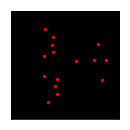

In [216]:
pic = plt.figure(figsize=(2,2))
pic.tight_layout(True)
black_size= 96*96
plt.imshow(np.reshape(np.concatenate((np.zeros(black_size),np.ones(96*96-black_size)),axis=0), (96, 96)), cmap = 'gray')
for iland, (ix,iy) in enumerate(array_test):
    plt.gca().scatter(ix, iy, c = 'red', s = 5)
plt.xticks([])
plt.yticks([])
plt.show()

In [217]:
pic.savefig('C:/Users/afern/Desktop/Berkeley/foo.png')
image = Image.open('C:/Users/afern/Desktop/Berkeley/foo.png')

In [210]:
?pic

In [234]:
new_img = image.resize((96,96))

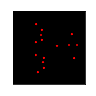

In [239]:
new_img

In [256]:
pd.DataFrame(numpy.array(new_img).flatten()).to_csv("C:/Users/afern/Desktop/Berkeley/foo.csv")

In [202]:
import numpy
 
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = numpy.frombuffer( fig.canvas.tostring_argb(), dtype=numpy.uint8 )
    print(w, h)
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = numpy.roll ( buf, 3, axis = 2 )
    return buf

from PIL import Image
 
def fig2img ( fig ):
    """
    @brief Convert a Matplotlib figure to a PIL Image in RGBA format and return it
    @param fig a matplotlib figure
    @return a Python Imaging Library ( PIL ) image
    """
    # put the figure pixmap into a numpy array
    buf = fig2data ( fig )
    w, h, d = buf.shape

    return buf #Image.frombytes( "RGBA", ( w ,h ), buf.tostring( ) )

In [ ]:
plt

In [205]:
?pic

In [195]:
numpy.frombuffer( fig.canvas.tostring_argb(), dtype=numpy.uint8 )

(4927824,)

In [224]:
print(new_img.frombytes)

<bound method Image.frombytes of <PIL.Image.Image image mode=RGBA size=96x96 at 0x2C07D4E8B70>>


In [220]:
fig2img(new_img).shape

AttributeError: 'Image' object has no attribute 'canvas'

In [192]:
96*96

9216

In [191]:
plt.imshow(np.reshape(fig2img(pic), (96, 96)), cmap = 'gray')

ValueError: cannot reshape array of size 82944 into shape (96,96)

In [165]:
' '.join(map(str,plt.flatten()))

AttributeError: module 'matplotlib.pyplot' has no attribute 'flatten'

In [136]:
array_test.size

AttributeError: 'list' object has no attribute 'size'

In [131]:
np.reshape(np.zeros(96*96), (96, 96))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
print(enumerate(array_test))

In [107]:
x_test = (96,96,1)
x_test[0]

96

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(yimg[:,:,3])
plt.title("The mask receives non-negative values at landmarks")
plt.show()

In [62]:
labels.iloc[0]

left_eye_center_x            66.033564
left_eye_center_y            39.002274
right_eye_center_x           30.227008
right_eye_center_y           36.421678
left_eye_inner_corner_x      59.582075
left_eye_inner_corner_y      39.647423
left_eye_outer_corner_x      73.130346
left_eye_outer_corner_y      39.969997
right_eye_inner_corner_x     36.356571
right_eye_inner_corner_y     37.389402
right_eye_outer_corner_x     23.452872
right_eye_outer_corner_y     37.389402
left_eyebrow_inner_end_x     56.953263
left_eyebrow_inner_end_y     29.033648
left_eyebrow_outer_end_x     80.227128
left_eyebrow_outer_end_y     32.228138
right_eyebrow_inner_end_x    40.227609
right_eyebrow_inner_end_y    29.002322
right_eyebrow_outer_end_x    16.356379
right_eyebrow_outer_end_y    29.647471
nose_tip_x                   44.420571
nose_tip_y                   57.066803
mouth_left_corner_x          61.195308
mouth_left_corner_y          79.970165
mouth_right_corner_x         28.614496
mouth_right_corner_y     

In [105]:
def get_target_coordinates(labels):
    x = labels.iloc[1::2].values
    y = labels.iloc[::2].values
    target_array = list(zip(x,y))
    return target_array

array_test = get_target_coordinates(pd.DataFrame(labels.iloc[0]))
array_test

[(array([39.00227368]), array([66.03356391])),
 (array([36.4216782]), array([30.22700752])),
 (array([39.64742256]), array([59.58207519])),
 (array([39.96999699]), array([73.13034586])),
 (array([37.3894015]), array([36.35657143])),
 (array([37.3894015]), array([23.45287218])),
 (array([29.03364812]), array([56.95326316])),
 (array([32.22813835]), array([80.22712782])),
 (array([29.0023218]), array([40.22760902])),
 (array([29.64747068]), array([16.35637895])),
 (array([57.06680301]), array([44.42057143])),
 (array([79.97016541]), array([61.19530827])),
 (array([77.38899248]), array([28.61449624])),
 (array([72.93545865]), array([43.3126015])),
 (array([84.48577444]), array([43.13070677]))]

In [ ]:
x= labels.iloc[:, 0::2].values
y= labels.iloc[:, 1::2].values
labels.iloc[0]

In [80]:
type(labels.iloc[0])

pandas.core.series.Series

In [78]:
x

array([[66.03356391, 30.22700752, 59.58207519, ..., 28.61449624,
        43.3126015 , 43.13070677],
       [64.33293617, 29.9492766 , 58.85617021, ..., 35.12238298,
        46.68459574, 45.46791489],
       [65.05705263, 30.90378947, 59.412     , ..., 33.72631579,
        47.27494737, 47.27494737],
       ...,
       [66.69073171, 31.66641951,         nan, ...,         nan,
                nan, 49.46257171],
       [70.96508235, 30.54328471,         nan, ...,         nan,
                nan, 50.06518588],
       [66.93831111, 31.09605926,         nan, ...,         nan,
                nan, 45.90048   ]])

In [88]:
y

array([[39.00227368, 36.4216782 , 39.64742256, ..., 77.38899248,
        72.93545865, 84.48577444],
       [34.9700766 , 33.44871489, 35.27434894, ..., 76.04765957,
        70.26655319, 85.48017021],
       [34.90964211, 34.90964211, 36.32096842, ..., 72.732     ,
        70.19178947, 78.65936842],
       ...,
       [36.84522146, 39.68504195,         nan, ...,         nan,
                nan, 78.11712   ],
       [39.85366588, 40.77233882,         nan, ...,         nan,
                nan, 79.58644706],
       [43.42450963, 39.52860444,         nan, ...,         nan,
                nan, 82.7730963 ]])

In [67]:
labels[0, 1::2]

TypeError: unhashable type: 'slice'

In [53]:
list(zip(x,y))

30

In [ ]:
plt.imshow(new_img[i], cmap = 'gray')

## Splitting kaggle_train and labels into test, training and development sets

In [ ]:
# How to deal with missing values?

# ignoring them?
index_none_missing = np.sum(np.isfinite(labels), axis = 1) == labels.shape[1]
kaggle_train_no_na = np.asarray(kaggle_train.loc[index_none_missing,:])
kaggle_train_no_na.shape

Ignoring them leads to not having much observations... but a lot of features...

In [ ]:
labels_no_na = np.asarray(labels.loc[index_none_missing,:])
labels_no_na.shape

In [ ]:
shuffle = np.random.permutation(np.arange(kaggle_train_no_na.shape[0]))
X, Y = kaggle_train_no_na[shuffle], labels_no_na[shuffle]

# Split 60% train, 20% dev, 20% test
split_train = 0.6
split_dev_test = 0.5
test = int(X.shape[0]*split_train)
dev = int(X.shape[0]*(1-split_train)*split_dev_test) + test
test_data, test_labels = X[:test], Y[:test]
dev_data, dev_labels = X[test:dev], Y[test:dev]
train_data, train_labels = X[dev:], Y[dev:]

print(test_data.shape, test_labels.shape)
print(dev_data.shape, dev_labels.shape)
print(train_data.shape, train_labels.shape)